**Parkinson's disease**:

A disorder of the central nervous system that affects movement, often including tremors.
Nerve cell damage in the brain causes dopamine levels to drop, leading to the symptoms of Parkinson's.
Parkinson's often starts with a tremor in one hand. Other symptoms are slow movement, stiffness and loss of balance.
Medication can help control the symptoms of Parkinson's.  
     




<u>Dataset Info</u>:  
<br>
name - ASCII subject name and recording number  
MDVP:Fo(Hz) - Average vocal fundamental frequency  
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency  
MDVP:Flo(Hz) - Minimum vocal fundamental frequency  
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency  
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude  
NHR,HNR - Two measures of ratio of noise to tonal components in the voice  
status - Health status of the subject (one) - Parkinson's, (zero) - healthy  
RPDE,D2 - Two nonlinear dynamical complexity measures  
DFA - Signal fractal scaling exponent  
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation  



In [1]:
import numpy as np
import pandas as pd                                 ## spread1,ppe,mdvp-fo,spread2,mdvp-fhi,mdvp-apq,mdvp-flo,nhr
import matplotlib.pyplot as plt
import sklearn

In [2]:
data=pd.read_csv("parkinson_data.csv")
data.describe()                         ##spread1,ppe,mdvp-fo,dpread2,mdvp-fhi,mdvp-apq,mdvp-flo,nhr
                                        ## 1.090,0.206,154.22,0.226,197.104,0.024,116.324,0.024
#np.mean(data['MDVP:APQ'])

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


(array([0.18142935, 0.07257174, 0.18142935, 0.25400109, 0.3628587 ,
        0.39914457, 0.32657283, 0.3628587 , 0.61685979, 0.54428805,
        0.25400109, 0.25400109, 0.14514348, 0.29028696, 0.32657283,
        0.14514348, 0.18142935, 0.07257174, 0.07257174, 0.07257174,
        0.07257174, 0.        , 0.10885761, 0.        , 0.03628587]),
 array([-7.120925  , -6.93344924, -6.74597348, -6.55849772, -6.37102196,
        -6.1835462 , -5.99607044, -5.80859468, -5.62111892, -5.43364316,
        -5.2461674 , -5.05869164, -4.87121588, -4.68374012, -4.49626436,
        -4.3087886 , -4.12131284, -3.93383708, -3.74636132, -3.55888556,
        -3.3714098 , -3.18393404, -2.99645828, -2.80898252, -2.62150676,
        -2.434031  ]),
 <BarContainer object of 25 artists>)

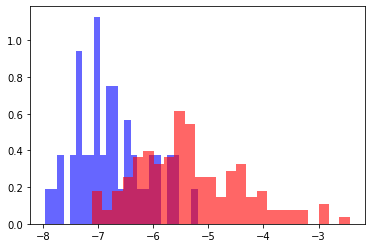

In [3]:
plt.hist(data['spread1'][data['status']==0],color='blue',bins=25,alpha=0.6,density=True,rwidth=1)
plt.hist(data['spread1'][data['status']==1],color='red',bins=25,alpha=0.6,density=True,rwidth=1)

In [4]:
data.isna().sum()   ## no NA in dataset 

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [5]:
target=data.iloc[:,17]
features=data.drop(['name','status'],axis=1)
features

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.7,random_state=0)


<AxesSubplot:>

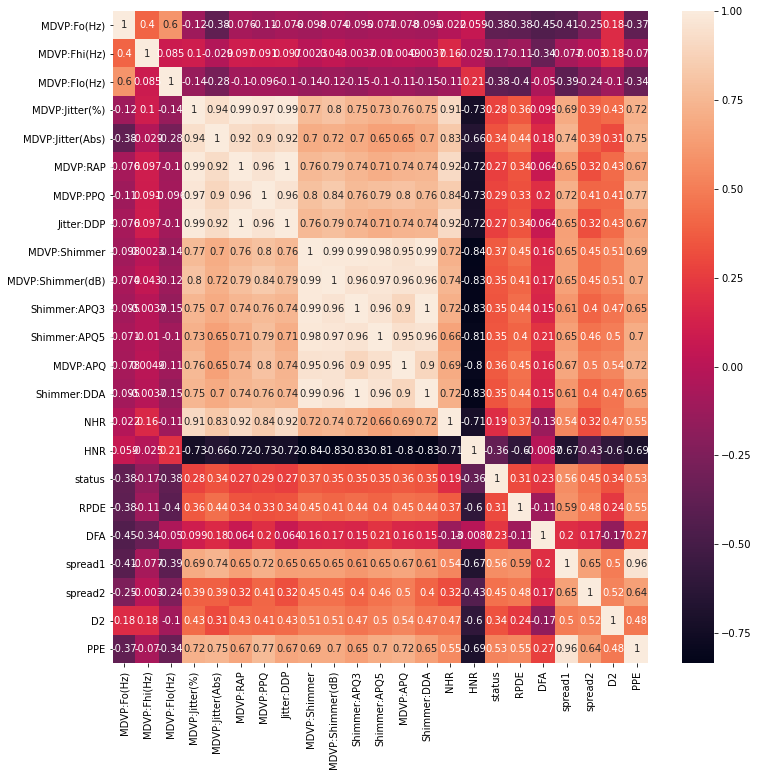

In [7]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True)

## Random Forest Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=0,n_jobs=-1)
mod=rf.fit(x_train,y_train)
print("training accuracy= {}".format(mod.score(x_train,y_train))) ## as accuracy is 1.0 which may lead to ovefitting the training dataset so we find important features
print("testing accuracy= {}".format(mod.score(x_test,y_test)))

training accuracy= 1.0
testing accuracy= 0.9491525423728814


### Random Forest classifier with important features

([<matplotlib.axis.XTick at 0x1e83eb50>,
 [Text(0, 0, 'spread1'),
  Text(1, 0, 'PPE'),
  Text(2, 0, 'MDVP:Fo(Hz)'),
  Text(3, 0, 'spread2'),
  Text(4, 0, 'MDVP:Fhi(Hz)'),
  Text(5, 0, 'MDVP:APQ'),
  Text(6, 0, 'MDVP:Flo(Hz)'),
  Text(7, 0, 'NHR'),
  Text(8, 0, 'RPDE'),
  Text(9, 0, 'D2'),
  Text(10, 0, 'Shimmer:APQ3'),
  Text(11, 0, 'Shimmer:APQ5'),
  Text(12, 0, 'HNR'),
  Text(13, 0, 'MDVP:Shimmer'),
  Text(14, 0, 'Shimmer:DDA'),
  Text(15, 0, 'Jitter:DDP'),
  Text(16, 0, 'MDVP:Shimmer(dB)'),
  Text(17, 0, 'MDVP:Jitter(Abs)'),
  Text(18, 0, 'DFA'),
  Text(19, 0, 'MDVP:RAP'),
  Text(20, 0, 'MDVP:PPQ'),
  Text(21, 0, 'MDVP:Jitter(%)')])

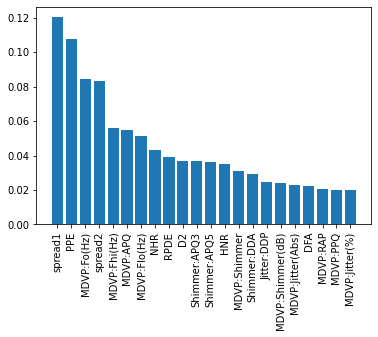

In [11]:
imp=mod.feature_importances_
indices=np.argsort(imp)[::-1]
names=[x_train.columns[i] for i in indices]
plt.bar(range(x_train.shape[1]),imp[indices])
plt.xticks(range(x_train.shape[1]),names,rotation=90)

In [12]:
print(indices)
print(np.sort(imp)[::-1])
print(x_train.columns)            ## spread1,ppe,mdvp-fo,dpread2,mdvp-fhi,mdvp-apq,mdvp-flo,nhr

[18 21  0 19  1 12  2 14 16 20 10 11 15  8 13  7  9  4 17  5  6  3]
[0.12019917 0.10770468 0.08427392 0.08313307 0.05617807 0.05497544
 0.05104647 0.04337557 0.03913754 0.03688237 0.03676014 0.03619974
 0.03479774 0.03099246 0.02952814 0.02476063 0.02393062 0.02296491
 0.0225848  0.02081216 0.02000655 0.01975581]
Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')


In [13]:
imp_columns=['spread1','PPE','MDVP:Fo(Hz)','spread2','MDVP:Fhi(Hz)','MDVP:APQ','MDVP:Flo(Hz)','NHR']
x_train_imp=x_train[imp_columns]
x_test_imp=x_test[imp_columns]

In [26]:
from sklearn import metrics
mod.fit(x_train_imp,y_train)
print("testing acuuracy= {}".format(mod.score(x_test_imp,y_test)))

metrics.confusion_matrix(y_test,mod.predict(x_test_imp))

testing acuuracy= 0.9491525423728814


array([[12,  1],
       [ 2, 44]], dtype=int64)

Accuracy on **test** data is **0.949152** using  importang features of **Random Forest**

### Logistic Regression

0.8455882352941176
0.9152542372881356


<AxesSubplot:>

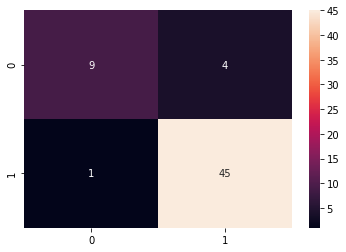

In [17]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(max_iter=1000)
#logreg.set_params('max_iter'=1000)
logreg.fit(x_train,y_train)
y_pred_logreg=logreg.predict(x_test)
print(logreg.score(x_train,y_train))
print(logreg.score(x_test,y_test))
sns.heatmap(metrics.confusion_matrix(y_test,y_pred_logreg),annot=True)

Text(0.5, 1.0, 'ROC curve')

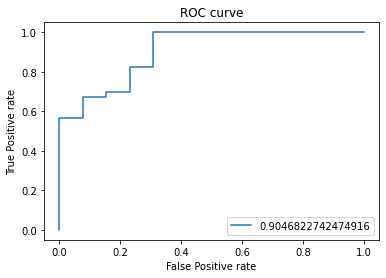

In [18]:
y_pred_prob=logreg.predict_proba(x_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_prob)
auc=metrics.roc_auc_score(y_test,y_pred_prob)
plt.plot(fpr,tpr,label=str(auc));plt.legend();plt.xlabel("False Positive rate");plt.ylabel("True Positive rate");plt.title("ROC curve")

### K Nearest Neighbors

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
standardizer=StandardScaler()
standardizer.fit(x_train)
x_train_std=standardizer.transform(x_train)
x_test_std=standardizer.transform(x_test)

knn=KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
knn.fit(x_train_std,y_train)
print(knn.score(x_train_std,y_train))
print(knn.score(x_test_std,y_test))

0.9411764705882353
0.9322033898305084


### Adaboost classifier

In [55]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
clf=AdaBoostClassifier(n_estimators=100)
clf.fit(x_train,y_train)
print(clf.score(x_train,y_train))
print(clf.score(x_test,y_test))



1.0
0.9491525423728814


In [57]:
from sklearn.ensemble import GradientBoostingClassifier

gbm=GradientBoostingClassifier(n_estimators=100)    ## gives 0.932 accuracy on test data if imp columns are used
gbm.fit(x_train,y_train)
print(gbm.score(x_train,y_train))
print(gbm.score(x_test,y_test))








1.0
0.9661016949152542


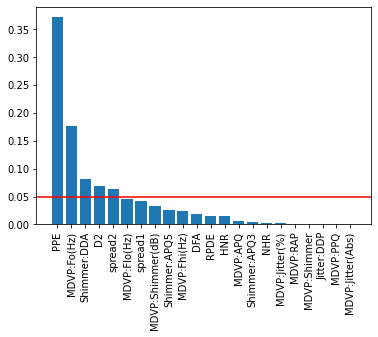

In [47]:
imp= gbm.feature_importances_
ind=np.argsort(gbm.feature_importances_)[::-1]

names=[x_train.columns[i] for i in ind]
plt.bar(range(x_train.shape[1]),imp[ind])
plt.xticks(range(x_train.shape[1]),names,rotation=90)
plt.axhline(y=0.05,color="red")

In [52]:
gbm_x_train_imp= x_train[['PPE', 'MDVP:Fo(Hz)', 'Shimmer:DDA', 'D2', 'spread2']]
gbm_x_test_imp= x_test[['PPE', 'MDVP:Fo(Hz)', 'Shimmer:DDA', 'D2', 'spread2']]

In [54]:
gbm.fit(gbm_x_train_imp,y_train)
gbm.score(gbm_x_test_imp,y_test)

0.9491525423728814

important features on gbm gives 94.91% accuracy

testing accuracy ranges between 93% to 94% for all models above.